In [1]:
# Import required modules
import glob
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import sklearn
import analysisFunctions as af

from scipy.stats import zscore
from scipy import stats

In [2]:
# Read in and store the framewise displacement (fd) for the given dataset in a variable called fdAvgs,
# and create the TS_path_names and indices2Keep variables

# Store the fdAvgs and set a threshold fd
filePath = '/Users/AV/Dropbox/COBRE/movementData/fdAvgs_COBRE.txt'
fdAvgs = pd.read_csv(filePath,header=None);
threshold_fd = 0.5

# Store the path of the folder containing the subject data for the given dataset
subPath = '/Users/AV/Dropbox/COBRE/cfgData/'

# Need to alphabetise and store the subject file names into a variable
TS_path_names = sorted(glob.glob(subPath + '*.mat'))

# Filter the subjects based on their fd, and retain the subjects that have an fd < threshold_fd
TS_path_names, indices2Keep = af.removePathNames(filePath, threshold_fd, TS_path_names)
indices2Keep = indices2Keep.tolist()

# Adding 1 to every element in the array to convert to MATLAB indexing
indices2KeepMat = list(np.asarray(indices2Keep) + 1)

# print(indices2KeepMat)

In [3]:
# Add a multi-level index to the tsData and store some key variables

element = 'element1_COBRE.txt' # Read in the feature matrix data from the saved .txt file
PyFeatList = 'PythonFeatureList.txt' # This text file contains the 22 feature names

# Add a multi-level index to the feature matrix and save into the variable, tsData
# Also store the number of ROIs and subjects in the data
tsData, ROIs, subjects, feats, featList = af.addIndices(element,subPath,PyFeatList)

In [4]:
# Choose which feature to analyse
feature = 1
featureName = featList[feature-1]

In [5]:
# Choose which ROI to analyse
ROI = 1

In [6]:
# Create the target column - unique for each dataset

# Select which dataset is being used
dataset = 'COBRE'

if dataset == 'UCLA':

    # Creating the target column
    targetCol = af.getTargetCol(TS_path_names)

elif dataset == 'COBRE':

    # Creating the target column
    csvPath = '/Users/AV/Dropbox/COBRE/participants.csv'
    COBRE = pd.read_csv(csvPath,header=None);

    targetCol = COBRE.iloc[1:,2]
    targetCol = targetCol.tolist()
    targetCol = pd.DataFrame(data=targetCol, columns=['target'])
    
    targetCol = targetCol.iloc[indices2Keep,:]
    targetCol = np.asarray(targetCol,dtype=np.int)

    # A '0' indicates a control subject and a '1' indicates a subject with SCZ
    targetColModified = np.where(targetCol==1, 0, targetCol) # First change the pre-existing 1s to 0s
    targetCol = np.where(targetCol==2, 1, targetColModified) # Then change the 2s to 1s

In [7]:
# Store and print the subject numbers within the dataset
Control, SCZ, Total, SCZ2Ctrl = af.giveMeSubjectNums(targetCol)

In [8]:
# Initialise a few boolean variables which decide what the outputs are
dispFigs = True
regAccOnly = False
featAccOnly = False

Analysis of Region 1:

10-fold CV scores as a percentage: [61.9  36.9  44.05 46.43 47.62 58.57 51.43 51.43 58.57 26.67]

Accuracy as a percentage: 48.36 +/- 10.17


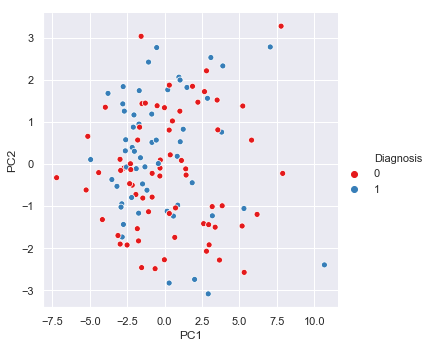

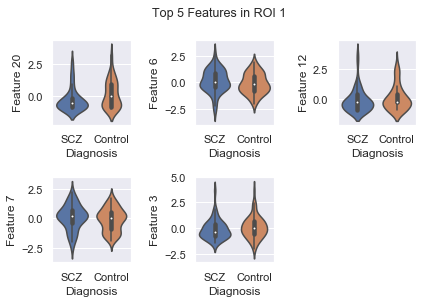


        % Accuracy  ROI Error
Region                       
161         68.047  14.730132
138         66.120  12.772730
302         64.880   8.305968
67          63.881  10.763784
91          63.594  18.196444

Mean Accuracy (across all regions) = 50.62%

Mean Error (across all regions) = 12.34%



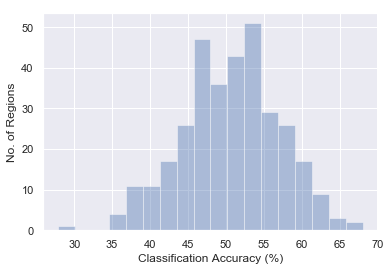

In [9]:
# Region by Region Analysis
af.Reg_by_Reg_Anal(ROI, tsData, targetCol, ROIs, indices2KeepMat, regAccOnly, dispFigs)

Analysis of Feature 1:

10-fold CV scores as a percentage: [77.38 45.24 52.38 35.71 53.57 48.57 75.71 51.43 58.57 70.  ]

Accuracy as a percentage: 56.86 +/- 12.90


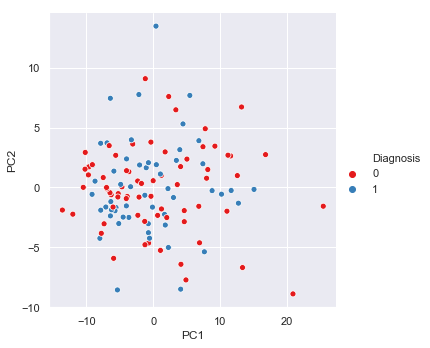

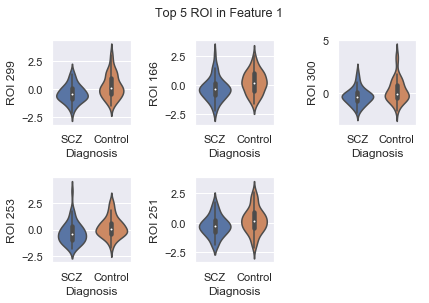

         % Accuracy  Feat Error
Feature                        
12           59.310   10.644746
9            59.072   17.250594
21           58.713   14.898127
22           58.142   10.106400
11           58.070   11.791795

Mean Accuracy (across all features) = 54.14%

Mean Error (across all features) = 13.94%



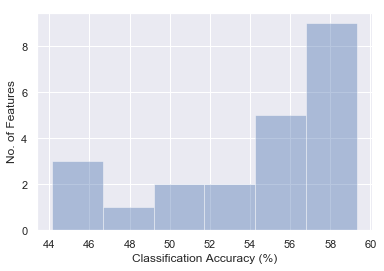

In [10]:
# Feature by Feature Analysis
af.Feat_by_Feat_Anal(feature, featureName, element, subPath, PyFeatList, 
                     indices2KeepMat, targetCol, featAccOnly, dispFigs)

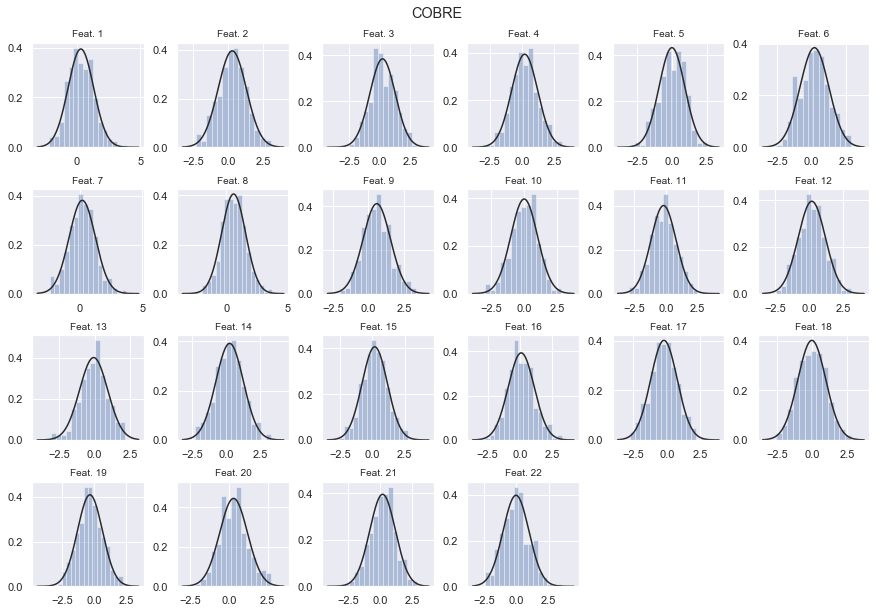

In [11]:
af.showMeTValHistograms(element,subPath,PyFeatList,dataset,indices2KeepMat,targetCol)

              UCLA Feat Acc (%)  UCLA Feat Error (%)
UCLA Feature                                        
1                        56.628            11.628645
2                        52.058            11.969631
3                        57.294            10.256191
4                        58.455            10.575818
5                        56.691            11.305549
6                        51.346             9.786335
7                        41.565             7.459397
8                        49.930            11.671320
9                        50.070            10.938685
10                       46.386             9.424997
11                       55.495             9.634925
12                       51.428             8.770512
13                       49.770            10.882897
14                       54.847             9.835078
15                       53.801            14.331299
16                       54.212             9.445022
17                       55.840             9.

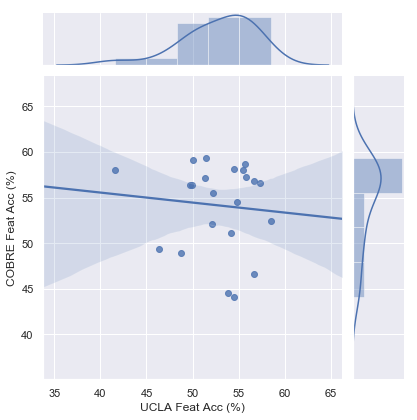

In [12]:
fp1 = '/Users/AV/Desktop/FeatureMatrixData/sortedFeats_UCLA.txt'
fp2 = '/Users/AV/Desktop/FeatureMatrixData/sortedFeats_COBRE.txt'

af.showMeJointPlot(fp1,fp2)

In [13]:
fp3 = '/Users/AV/Desktop/FeatureMatrixData/featBalancedAcc_UCLA_shuff.txt'
fp4 = '/Users/AV/Desktop/FeatureMatrixData/featBalancedAcc_COBRE_shuff.txt'

af.computeCombPVals(fp1,fp2,fp3,fp4,feats)

         Combined P-Values
Feature                   
1                    0.010
2                    0.017
3                    0.026
4                    0.040
5                    0.044
6                    0.044
7                    0.047
8                    0.066
9                    0.088
10                   0.104
11                   0.106
12                   0.121
13                   0.226
14                   0.220
15                   0.335
16                   0.417
17                   0.546
18                   0.611
19                   0.687
20                   0.816
21                   0.924
22                   0.987


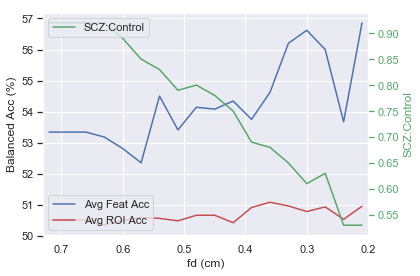

In [14]:
# Plot the fd vs balanced accuracy

# Import and store the fdArray
filePathA = '/Users/AV/Desktop/FeatureMatrixData/fdArray_COBRE_E1.txt'

af.giveMeFDvBalancedAcc(filePathA)

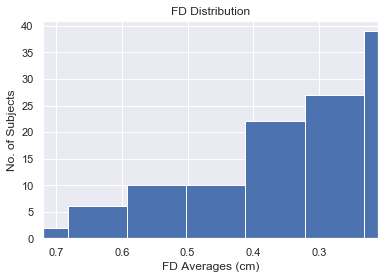

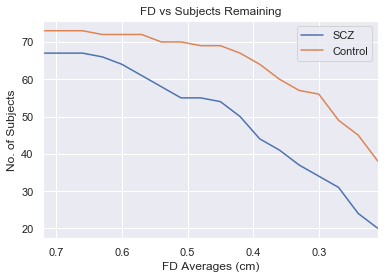

In [15]:
# Navigate to the 'fdAvgs_DATASET.txt' file
filePathB = '/Users/AV/Dropbox/COBRE/movementData/fdAvgs_COBRE.txt'

af.showMeFDAcrossSubs(filePathA,filePathB)